In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [9]:
display(sber_data.shape[0])# Количество строк в таблице


30471

In [12]:
# Сколько районов Москвы и Московской области представлено в данных?
sber_data['sub_area'].value_counts()

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

In [13]:
# Чему равна максимальная цена квартир (price_doc)?
sber_data['price_doc'].max()

111111112

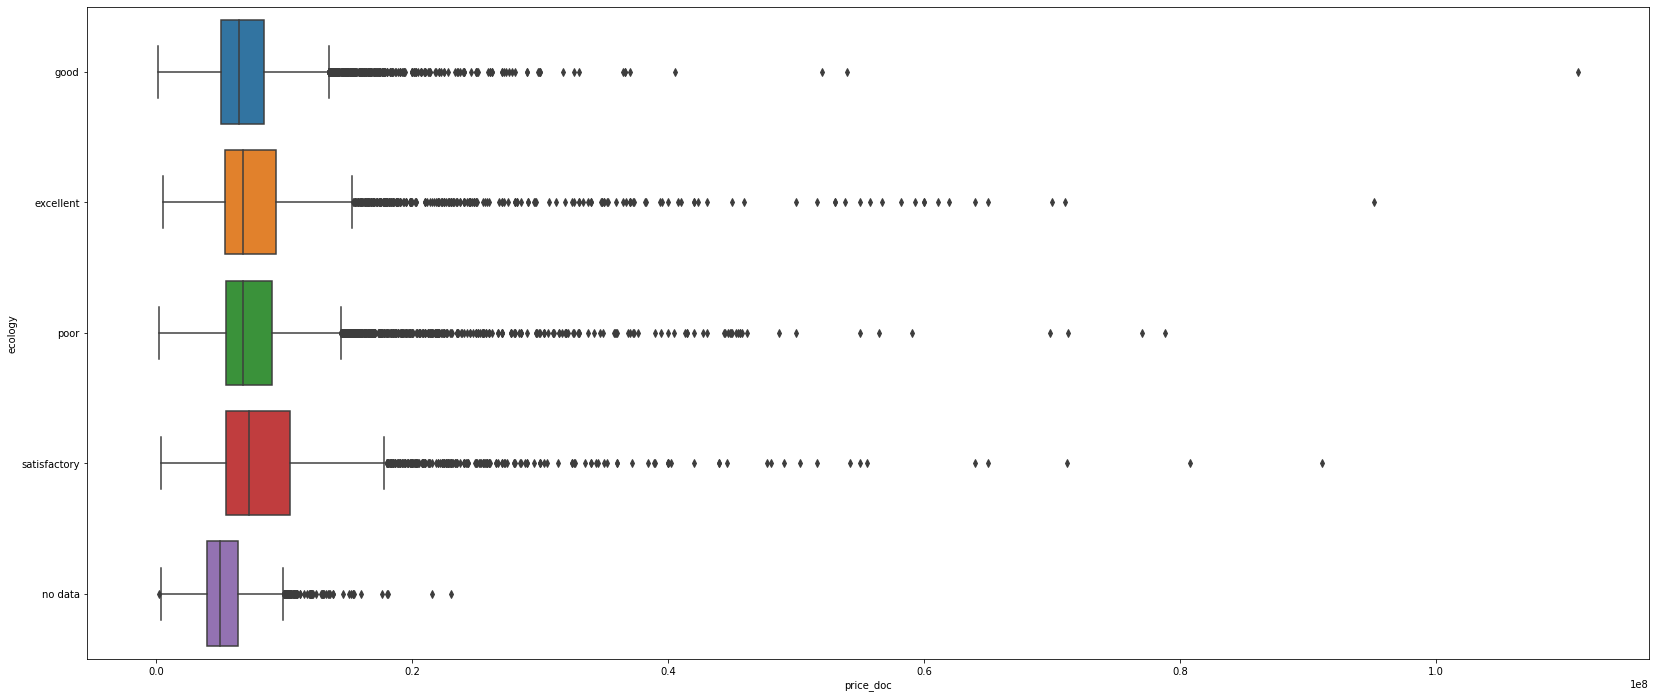

In [46]:
#2.4 Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры
ecology = sber_data['ecology']
price_doc = sber_data['price_doc']
fig = plt.figure(figsize= (28, 12))
boxplot = sns.boxplot(
    data=sber_data,
    y=ecology,
    x=price_doc,
    )
# Эталонное решение
# fig = plt.figure(figsize=(10, 5))
# sns.boxplot(data=sber_data, x='price_doc', y='ecology');


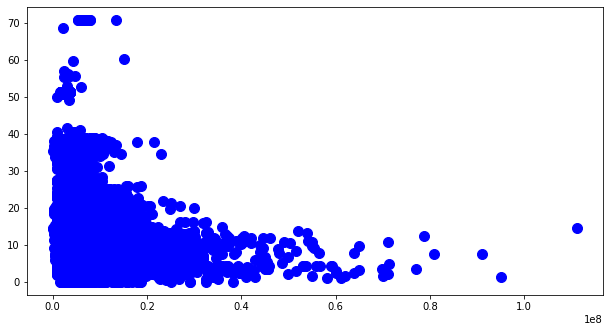

In [48]:
#2.5Постройте диаграмму рассеяния, которая покажет, как цена на квартиру (price_doc) связана с расстоянием до центра Москвы (kremlin_km). 
# Выберите все верные утверждения.
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=price_doc,
    y=sber_data['kremlin_km'],
    s=100,
    marker='o',
    c = 'blue'
    
    );
    


In [ ]:
#Верно:
#Вариант B. Из отметок на оси абсцисс видно, что большая часть наблюдений (точек) находится в интервале от 0 до 40 км, далее частота резко падает.
#Вариант C. Из построенного графика видно, что с ростом расстояния до центра города постепенно уменьшается значение стоимости квартир.
#ОтправитьВ некоторых задачах доступны следующие действия: сохранение, сброс, показ подсказки или ответа. Соответствующие кнопки расположены рядом с кнопкой «Отправить».



### <center> 3. Работа с пропусками: как их обнаружить?

In [51]:
# Метод isnull(). Этот метод возвращает новый DataFrame, в ячейках которого стоят булевы значения True и False. 
# True ставится на месте, где ранее находилось значение NaN.
display(sber_data.isnull().tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
### СПИСОК СТОЛБЦОВ С ПРОПУСКАМИ
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)


hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

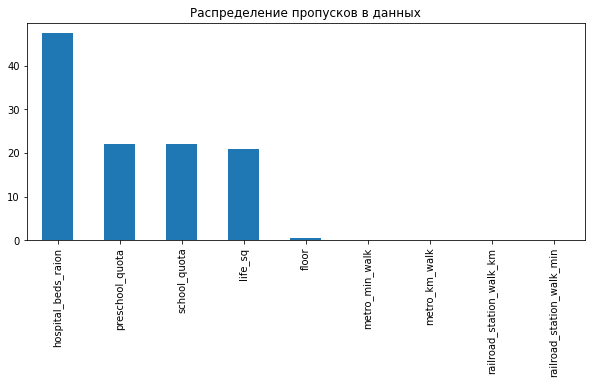

In [55]:
### СТОЛБЧАТАЯ ДИАГРАММА ПРОПУСКОВ
#Можно воспользоваться столбчатой диаграммой, чтобы визуально оценить соотношение числа пропусков к числу записей. Самый быстрый способ построить её — использовать метод plot():
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

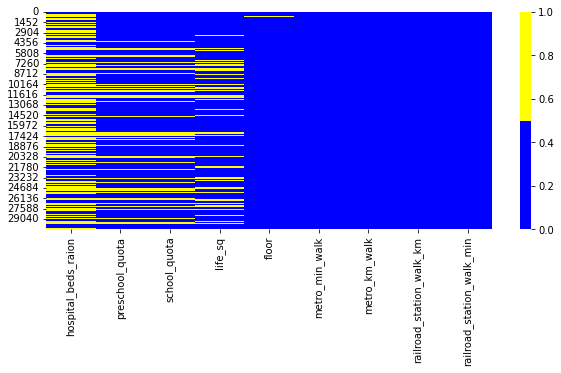

In [56]:
# ТЕПЛОВАЯ КАРТА ПРОПУСКОВ 
#Её часто используют, когда столбцов с пропусками не так много (меньше 10)
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)